In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def theoretical_bound(k, kappa, r0):
    q = (np.sqrt(kappa) - 1) / (np.sqrt(kappa) + 1)
    return 2 * (q**k) * r0

In [3]:
N = 10000
residual_file = f"residuals_{N}.txt"

In [4]:
data = np.loadtxt(residual_file)
iters, residuals = data[:, 0], data[:, 1]

In [5]:
r0 = residuals[0]
k_vals = np.arange(len(residuals))

In [6]:
A = np.fromfunction(lambda i, j: (N - np.abs(i - j)) / N, (N, N), dtype=int)
eigvals = np.linalg.eigvalsh(A)
kappa = np.max(eigvals) / np.min(eigvals)
print(f"Estimated condition number κ(A) = {kappa:.2e}")

Estimated condition number κ(A) = 1.35e+08


In [7]:
bound = theoretical_bound(k_vals, kappa, r0)

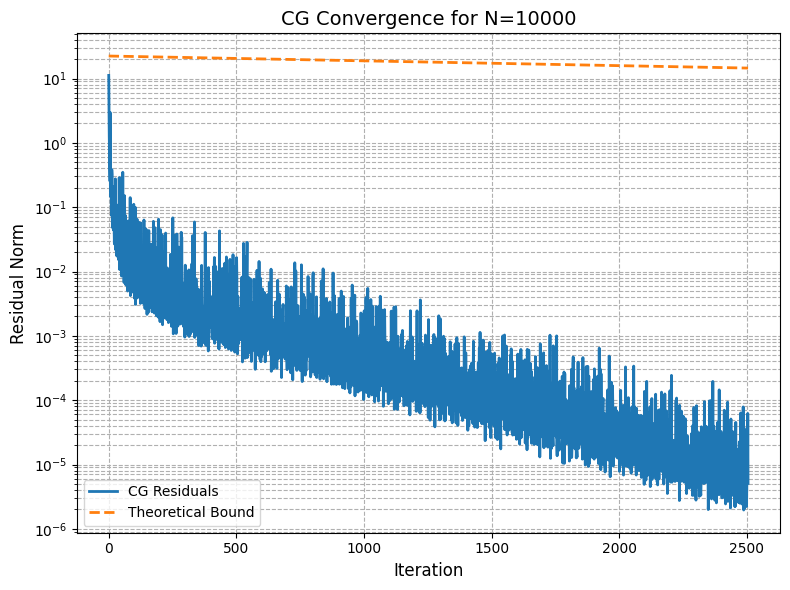

In [8]:
plt.figure(figsize=(8, 6))
plt.semilogy(iters, residuals, label="CG Residuals", linewidth=2)
plt.semilogy(k_vals, bound, '--', label="Theoretical Bound", linewidth=2)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Residual Norm", fontsize=12)
plt.title(f"CG Convergence for N={N}", fontsize=14)
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.savefig(f"cg_convergence_N{N}.png")
plt.show()